<a href="https://colab.research.google.com/github/UgurUysal86/My-ML-Notebooks/blob/main/regression/ex-2/20240320_Training_a_regression_model_on_the_Auto_MPG_dataset_to_predict_fuel_efficiency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## [Ugur Uysal](https://github.com/UgurUysal86) - ugur.uysal.86@gmail.com - 20. MAR 2024
## Training a regression model on the Auto MPG dataset to predict fuel efficiency

* This notebook demonstrates the process of training a neural network-based regression model utilizing tensorflow.keras on the Auto MPG dataset to predict fuel efficiency.

* Portions of this notebook are modifications based on work created and shared by Google (https://www.tensorflow.org/tutorials/keras/regression) and used according to terms described in the Creative Commons 4.0 Attribution License. Code samples are licensed under the Apache 2.0 License.

## 1. Imports and settings
The code below sets up libraries for TensorFlow, visualization, and data manipulation in Python. It’s a common starting point for machine learning and data science projects.

In [ ]:
import tensorflow as tf
print("Using Tensorflow Version", tf.__version__, "\n")
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=3, suppress=True)
import pandas as pd
import seaborn as sns

Using Tensorflow Version 2.15.0 



## 2. Loading and exploring the dataset

The code below loads a the auto-mpg dataset from a URL, clean it by removing missing values, map numeric country codes to country names, and perform one-hot encoding for further analysis. Specifically, it prepares the data for machine learning or statistical tasks related to automotive attributes.

In [ ]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight','Acceleration', 'Model Year', 'Origin']

dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

dataset = dataset.dropna()
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


## 3. Spliting the data into training and test sets

The code below splits the dataset into training and test subsets for machine learning tasks:

Data Splitting:
train_data contains 80% of the original dataset, randomly sampled.
test_data includes the remaining 20% by excluding the rows present in train_data.
Feature and Label Separation:
train_x and test_x are copies of the features (input variables) from the training and test data, respectively.
train_y and test_y store the corresponding labels (target variable, in this case, ‘MPG’).

In [ ]:
train_data = dataset.sample(frac=0.8, random_state=0)
test_data = dataset.drop(train_data.index)

print("train_data shape:", train_data.shape)
print("test_data shape:" , test_data.shape)

train_x = train_data.copy()
test_x = test_data.copy()

train_y = train_x.pop('MPG')
test_y = test_x.pop('MPG')

print('\n' + "features sample:"+ '\n', train_x.iloc[0])
print('\n' + "Label sample:", train_y[0])

train_data shape: (314, 10)
test_data shape: (78, 10)

features sample:
 Cylinders          4.0
Displacement      90.0
Horsepower        75.0
Weight          2125.0
Acceleration      14.5
Model Year        74.0
Europe             0.0
Japan              0.0
USA                1.0
Name: 146, dtype: float64

Label sample: 18.0


## 4. Feature-wise normalization of the data (substract mean of feature and divide by std deviation)

The purpose of the code below is to normalize the features in the training and test datasets:

mmean = train_x.mean(axis=0): Calculates the mean (average) of each feature along the rows (axis 0) in the training data.
train_x -= mean: Subtracts the mean from each feature in the training data, centering the distribution around zero.
std = train_x.std(axis=0): Computes the standard deviation of each feature in the training data.
train_x /= std: Divides each feature by its standard deviation, scaling the features to have unit variance.
The same normalization process is then applied to the test data (test_x). Finally, the code prints the shapes of the normalized training and test data, along with a sample feature row from the training data and its corresponding label.

In [ ]:
mean = train_x.mean(axis=0)
train_x -= mean
std = train_x.std(axis=0)
train_x /= std

test_x -= mean
test_x /= std

print("train_data shape:", train_x.shape)
print("test_data shape:", test_x.shape)
print('\n' + "features sample:" + '\n', train_x.iloc[0])
print('\n' + "Label sample:", train_y[0])

train_data shape: (314, 9)
test_data shape: (78, 9)

features sample:
 Cylinders      -0.869348
Displacement   -1.009459
Horsepower     -0.784052
Weight         -1.025303
Acceleration   -0.379759
Model Year     -0.516397
Europe         -0.465148
Japan          -0.495225
USA             0.774676
Name: 146, dtype: float64

Label sample: 18.0


## 5. building the model

The code below creates a Sequential neural network model using Keras (a high-level neural networks API) with the following characteristics:

Model Architecture:
The model consists of three layers:
The first layer is a Dense layer with 64 units and a ReLU activation function.
The second layer is another Dense layer with 64 units and a ReLU activation function.
The third layer is a Dense layer with a single output unit (for regression tasks).
The input shape for the first layer is determined by the number of features in the training data (train_x.shape[1]).
Compilation:
The model is compiled using the RMSprop optimizer with a learning rate of 0.0001.
The loss function used during training is the mean squared error (MSE).
The model’s performance is evaluated using the mean absolute error (MAE) metric.
Summary:
The model.summary() call displays a summary of the model architecture, including the layer types, output shapes, and trainable parameters.

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(64, activation=tf.nn.relu, input_shape=(train_x.shape[1],)))
model.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(1))

model.compile(optimizer=tf.keras.optimizers.RMSprop(0.0001), loss=tf.keras.losses.mean_squared_error, metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4865 (19.00 KB)
Trainable params: 4865 (19.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 6. Training the model

The purpose of the provided code is to train a neural network model (model) using the training features (train_x) and corresponding labels (train_y). Here are the key steps:

Training Configuration:
EPOCHS = 1000: Specifies the maximum number of training epochs (iterations).
early_stop: Sets up early stopping based on validation loss. If the validation loss doesn’t improve for a certain number of epochs (patience), training stops early.
Model Training:
model.fit(...): Trains the model using the training data (train_x, train_y).
It monitors the validation loss during training and stops early if necessary.
The batch size is set to 16, and progress updates are displayed (verbose=2)

In [ ]:
EPOCHS = 1000
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=50, verbose=1, mode='auto', baseline=None, restore_best_weights=True)
history = model.fit(train_x, train_y, epochs=EPOCHS, validation_split = 0.1, batch_size=16, verbose=2, callbacks=[early_stop])

Epoch 1/1000
18/18 - 1s - loss: 594.8372 - mean_absolute_error: 23.2109 - val_loss: 598.8395 - val_mean_absolute_error: 22.9937 - 984ms/epoch - 55ms/step
Epoch 2/1000
18/18 - 0s - loss: 588.0789 - mean_absolute_error: 23.0735 - val_loss: 592.4804 - val_mean_absolute_error: 22.8633 - 59ms/epoch - 3ms/step
Epoch 3/1000
18/18 - 0s - loss: 581.9639 - mean_absolute_error: 22.9503 - val_loss: 586.1045 - val_mean_absolute_error: 22.7334 - 62ms/epoch - 3ms/step
Epoch 4/1000
18/18 - 0s - loss: 575.9917 - mean_absolute_error: 22.8286 - val_loss: 579.9814 - val_mean_absolute_error: 22.6070 - 81ms/epoch - 4ms/step
Epoch 5/1000
18/18 - 0s - loss: 570.1420 - mean_absolute_error: 22.7086 - val_loss: 573.8218 - val_mean_absolute_error: 22.4800 - 74ms/epoch - 4ms/step
Epoch 6/1000
18/18 - 0s - loss: 564.0403 - mean_absolute_error: 22.5831 - val_loss: 567.4878 - val_mean_absolute_error: 22.3488 - 93ms/epoch - 5ms/step
Epoch 7/1000
18/18 - 0s - loss: 557.7982 - mean_absolute_error: 22.4550 - val_loss: 56

## 7. Printing training results

This code organizes and extracts relevant information from the training history.

In [ ]:
history_dict = history.history
hist = pd.DataFrame(history_dict)
hist['epoch'] = history.epoch
print(hist)

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
mae_values = history_dict['mean_absolute_error']
val_mae_values = history_dict['val_mean_absolute_error']

           loss  mean_absolute_error    val_loss  val_mean_absolute_error  \
0    594.837219            23.210873  598.839478                22.993738   
1    588.078918            23.073481  592.480408                22.863316   
2    581.963928            22.950340  586.104492                22.733408   
3    575.991699            22.828606  579.981445                22.607031   
4    570.142029            22.708612  573.821777                22.479969   
..          ...                  ...         ...                      ...   
265    6.687556             1.781691    7.768124                 2.156497   
266    6.691223             1.782979    7.759210                 2.154159   
267    6.681182             1.783610    7.714502                 2.139633   
268    6.687447             1.781094    7.761332                 2.148010   
269    6.666184             1.782499    7.800639                 2.154665   

     epoch  
0        0  
1        1  
2        2  
3        3  
4        4

## 8. Plotting training results (loss)

The code to create the plot below shows the training loss (loss_values) and validation loss (val_loss_values) over the training epochs:

The x-axis represents the number of epochs, and the y-axis represents the loss. The blue dots correspond to training loss, while the solid blue line represents validation loss. As training progresses, we aim to minimize both losses.

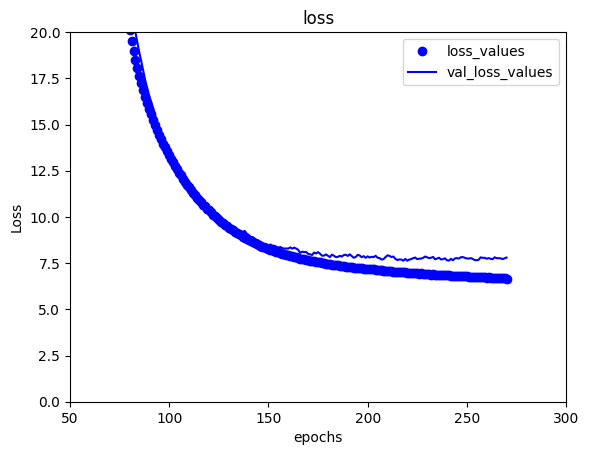

In [ ]:
epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, 'bo', label='loss_values')
plt.plot(epochs, val_loss_values, 'b', label='val_loss_values')
plt.title("loss")
plt.xlabel("epochs")
plt.xlim(50,300)
plt.ylabel("Loss")
plt.ylim(0,20)
plt.legend()

## 9. Plotting training results (mean_absolute_error)

The code to create the plot below illustrates the mean absolute error (MAE) during training:

The x-axis represents the number of epochs.
The y-axis represents the MAE.
Blue dots correspond to training MAE, while the solid blue line represents validation MAE.

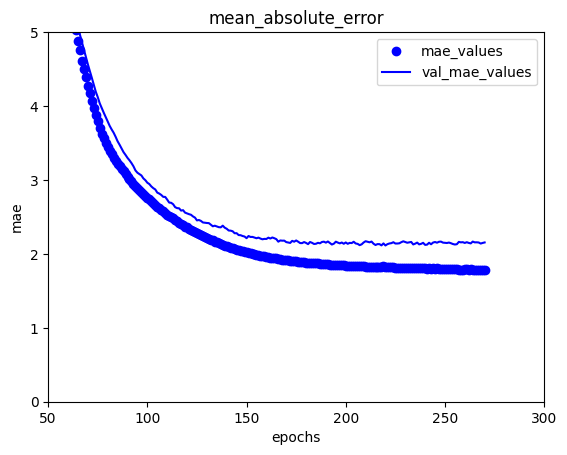

In [ ]:
plt.plot(epochs, mae_values, 'bo', label='mae_values')
plt.plot(epochs, val_mae_values, 'b', label='val_mae_values')
plt.title("mean_absolute_error")
plt.xlabel("epochs")
plt.xlim(50,300)
plt.ylabel("mae")
plt.ylim(0,5)
plt.legend()

## 10. Testing the trained model

The code below calculates the mean absolute error (MAE) on the test set. This metric quantifies the average absolute difference between the predicted MPG values and the actual MPG values in the test data. Lower MAE values indicate better model performance.

In [ ]:
test_mse_score, test_mae_score = model.evaluate(test_x, test_y)
print("Testing set Mean Abs Error: {:5.2f} MPG".format(test_mae_score))

3/3 [==============================] - 0s 5ms/step - loss: 5.8050 - mean_absolute_error: 1.8163
Testing set Mean Abs Error:  1.82 MPG


## 11. Printing test results and comparing them with the true MPG values

The code below predicts values using the trained model on the test features (test_x).

test_predictions = model.predict(test_x).flatten(): This line predicts the target variable (MPG) for the test data using the trained neural network model. The .flatten() method converts the predictions into a one-dimensional array.
result = pd.DataFrame(test_predictions, test_y): Creates a pandas DataFrame (result) with the predicted values (test_predictions) and the actual MPG values (test_y).
result.columns = ['pred']: Renames the column to ‘pred’ for clarity.
The resulting DataFrame contains predicted MPG values alongside the actual values.

In [ ]:
test_predictions = model.predict(test_x).flatten()
result = pd.DataFrame(test_predictions, test_y)
result.columns = ['pred']
print(result.to_string())

3/3 [==============================] - 0s 4ms/step
           pred
MPG            
15.0  15.270190
10.0  11.382819
9.0   11.790127
25.0  23.542578
19.0  20.787775
14.0  13.067539
14.0  13.309091
13.0  12.842205
18.0  19.391485
35.0  29.652946
25.0  25.240049
19.0  25.441902
13.0  15.155994
28.0  26.323952
13.0  12.531286
14.0  14.580706
15.0  14.445217
13.0  13.197252
18.0  18.387253
12.0  12.772901
16.0  13.932587
24.0  26.075436
19.0  19.647066
24.0  21.019909
31.0  29.963877
26.0  23.695925
16.0  16.545876
24.0  23.848761
18.0  16.778681
20.0  19.481920
29.0  28.604029
18.0  20.918613
19.0  18.522295
22.0  21.564175
26.0  26.558668
17.5  16.071287
22.5  18.919333
29.0  30.144716
29.0  30.839146
20.0  17.582266
32.0  30.979628
28.0  29.435320
13.0  15.833887
43.1  35.184460
36.1  34.698212
32.8  34.661659
20.5  20.202412
20.8  22.144197
18.1  19.473330
27.5  27.180834
30.9  31.106665
17.0  19.836037
29.5  32.059898
16.5  18.258085
15.5  17.515938
18.5  17.614935
31.9  34.456253
34.1 

## 12. Plotting test results (scatter plot - True MPG values vs. predicted MPG values)

The scatter plot below compares the true MPG values with the predicted MPG values from the trainined model:

The x-axis represents the true MPG values.
The y-axis represents the predicted MPG values.
The diagonal line indicates perfect predictions (where true and predicted values match).

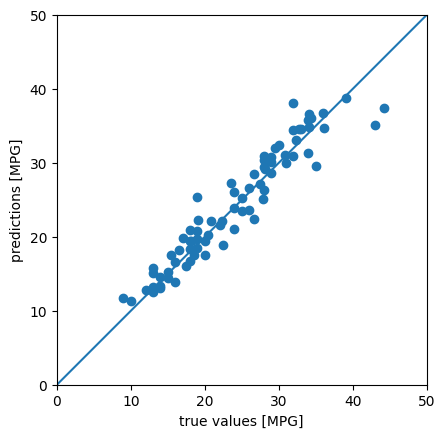

In [ ]:
plt.axes(aspect='equal')
plt.scatter(test_y, test_predictions)
plt.xlabel('true values [MPG]')
plt.ylabel('predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims)

## 13. Plotting test results (error plot)

The histogram below shows the distribution of prediction errors for the trained model:

The x-axis represents the prediction error (difference between predicted and true MPG values of the test set).
The y-axis represents the count of instances falling within each error bin.

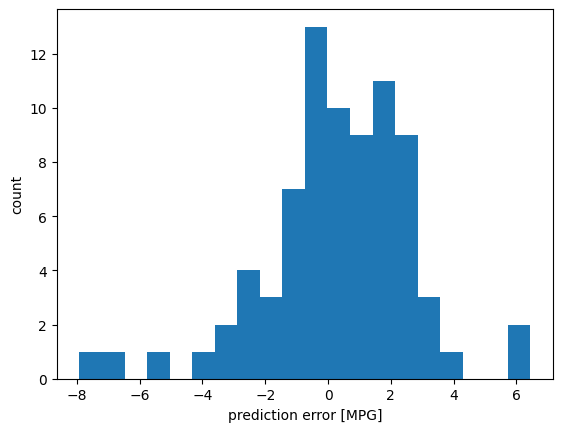

In [ ]:
error = test_predictions - test_y
plt.hist(error, bins = 20)
plt.xlabel("prediction error [MPG]")
_ = plt.ylabel("count")

## 14. calculating r2score and maep

The code below calculated evaluation metrics for the trained regression model:

R-squared (r²):
The r2_score function from sklearn.metrics calculates the coefficient of determination (R-squared) for regression models.
R-squared measures how well the model explains the variance in the target variable (test_y) based on the predictions (test_predictions).
The value of R-squared ranges from 0 to 1, where 1 indicates a perfect fit.
In this case, the R-squared value is approximately 0.9111, which means that about 91.11% of the variance in the target variable is explained by the model.

Mean Absolute Error (MAE):
The mean_absolute_error function computes the average absolute difference between the predicted values and the true values (test_y).
MAE represents the average magnitude of errors in the predictions.
The MAE value is approximately 1.8163, indicating that, on average, the predictions are off by around 1.82 MPG.

Mean Absolute Percentage Error (MAE Percentage):
The mean_absolute_percentage_error function calculates the percentage error between predicted and true values.

The MAE Percentage is approximately 7.91%, which means that, on average, the predictions deviate by 7.91% from the true values.

In [ ]:
from sklearn import metrics

r_squared = metrics.r2_score(test_y, test_predictions)
print("r²: ", r_squared)

mae = metrics.mean_absolute_error(test_y, test_predictions)
print("MAE: ", mae)

# https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics
mae_p = metrics.mean_absolute_percentage_error(test_y, test_predictions) * 100
print("MAE Percentage: ", mae_p, "This indicates that the average absolute difference between the predicted values and the true value is", mae_p, "%.")

r²:  0.911111266214375
MAE:  1.8162552662384814
MAE Percentage:  7.91353932382968 This indicates that the average absolute difference between the predicted values and the true value is 7.91353932382968 %.


## References:
* TensorFlow: https://www.tensorflow.org/
* Tensorflow Basic regression: Predict fuel efficiency:https://www.tensorflow.org/tutorials/keras/regression
* Keras: https://keras.io/
* Chollet, F. (2018). Deep learning with Python. p. 85-91
* Quinlan,R.. (1993). Auto MPG. UCI Machine Learning Repository. https://archive.ics.uci.edu/dataset/9/auto+mpg
* scikit-learn: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

## Thank you. Visit my personal GitHub page https://github.com/UgurUysal86 for more examples.